In [6]:
import pandas as pd
import yfinance as yf
from pandas_datareader import data
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import talib 
from dateutil.relativedelta import relativedelta
from sklearn.decomposition import PCA
import seaborn as sns
import numpy as np

from Tool_v1 import *

# Machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import MinMaxScaler
yf.pdr_override()

In [7]:
stock_name=["AAPL","GOOG","AMZN","TSLA","BABA","PTPI","BTCY",'FOX',"NVDA","DIS","NKE","XOM","KO",
            "2319.HK","0700.HK","1211.HK","6133.hk",'2318.HK','1448.HK','1810.HK',"3690.HK","2018.HK"]
start="2020-12-31"
end="2023-12-01"



score=[]

In [32]:
for i in stock_name:
    #MACD619RSI21_8020
    stock_data=pct_change(i,start,end)
    stock_data=stock_data.copy()
    #指标运算
    stock_data=MACD_short(stock_data)
    stock_data=RSI(stock_data)
    stock_data=RSI_MACD(stock_data,21,80,20)
    stock_data= my_rsi(stock_data, 21)
    stock_data = stock_data.dropna()
    X = stock_data.loc[:,["Open","High","Close_price_percentage","log_return","re_close", "re_open", "MACD","Position"]].values
    #X = stock_data.loc[:,["Open","High","Low","Close"]].values
    st_x= StandardScaler()  
    X= st_x.fit_transform(X)  

    #Y = stock_data.loc[:,["up_or_down"]].values.ravel()
    Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)
    #Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

    #X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

    split = int(0.7*len(stock_data))
   
    X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    
    # Random forest
    rf = RandomForestClassifier(max_depth= 4, n_estimators=184)
    
    # Train the model on training data
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    
    new_test = np.concatenate(([0],Y_test))
    new_pred=np.concatenate((Y_pred,[-1]))

    test_data=stock_data.tail(len(stock_data)-split+1)
    test_data=test_data.copy()
    test_data["Position"]=new_pred
    test_data["real_situation"]=new_test
    print(revenue(test_data))
    
    #print(Y_pred)
    accuracy = accuracy_score(Y_test, Y_pred)
    score.append(accuracy)
    print("Accuracy:", accuracy)
    
    
    print()

([0.8372093023255814], [0.28720836826511853], [1.013188938729594])
Accuracy: 0.8411214953271028

([0.8232558139534883], [0.3000037866347798], [1.6094436737032156])
Accuracy: 0.8271028037383178

([0.8232558139534883], [0.4165468666847758], [1.833105542559486])
Accuracy: 0.8271028037383178

([0.8790697674418605], [0.5119230942254305], [2.6470833643069627])
Accuracy: 0.883177570093458

([0.7302325581395349], [-0.46692737818182106], [1.1860514969149243])
Accuracy: 0.7336448598130841

([0.7627906976744186], [-0.497279501775564], [5.5640911758499385])
Accuracy: 0.7663551401869159

([0.7488372093023256], [0.0953101594845594], [5.198621205703096])
Accuracy: 0.7523364485981309

([0.8093023255813954], [-0.1019925727255595], [1.067961930448062])
Accuracy: 0.8130841121495327

([0.8046511627906977], [0.8869520514416918], [2.334589801987015])
Accuracy: 0.8084112149532711

([0.8186046511627907], [-0.13417847588484744], [1.1287927772869972])
Accuracy: 0.822429906542056

([0.8232558139534883], [-0.1399

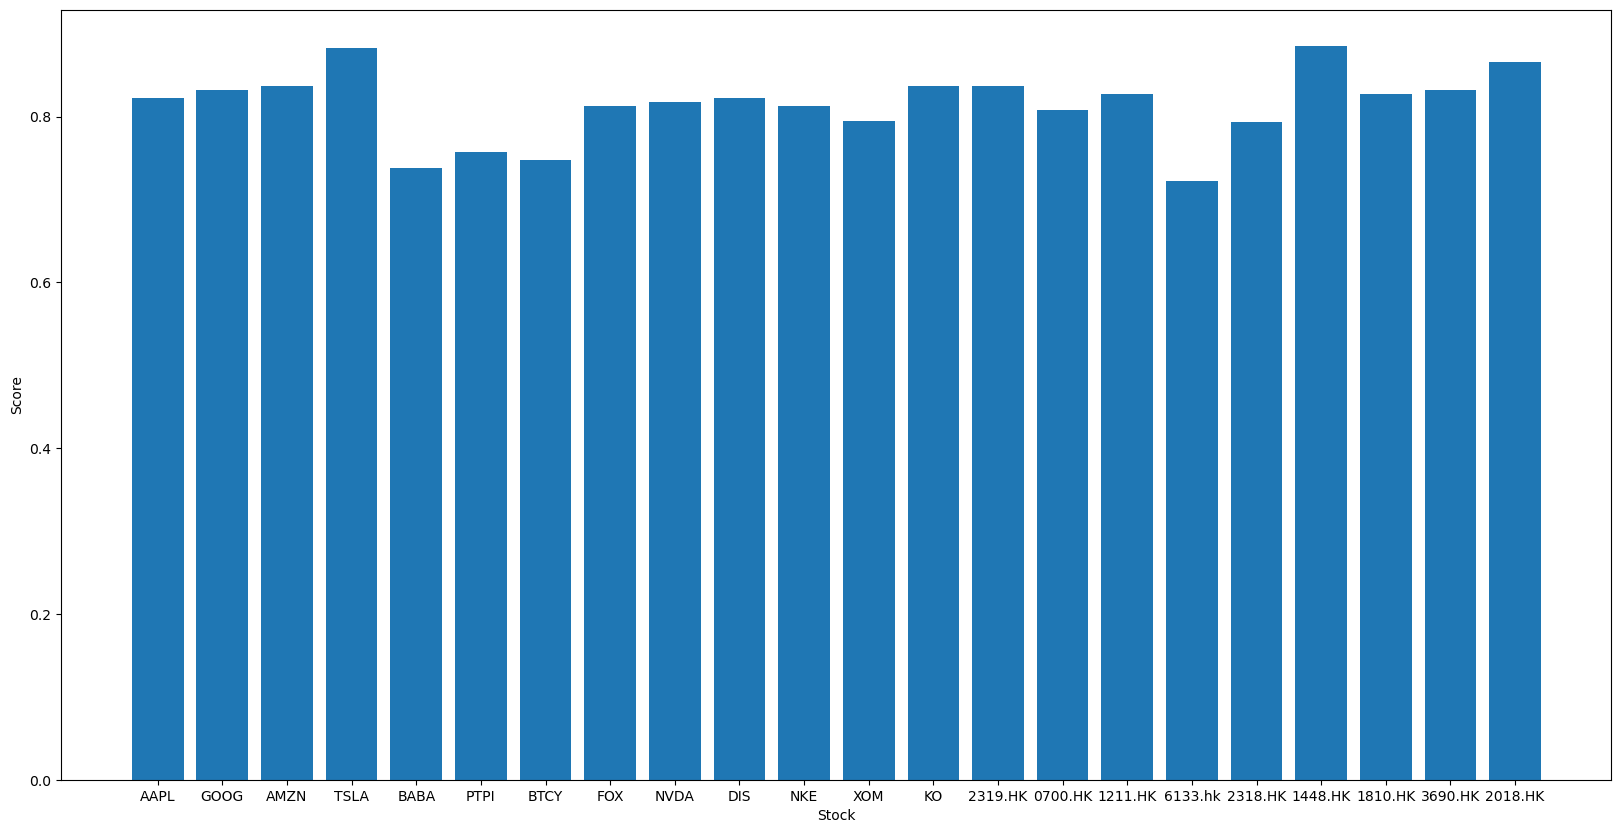

In [4]:
plt.figure(figsize=(20, 10))
plt.bar(stock_name, score)


plt.xlabel('Stock')
plt.ylabel('Score')

plt.savefig('random forest Score.png')
# 显示图形
plt.show()

In [30]:
stock_data=pct_change("AAPL",start,end)
stock_data=stock_data.copy()
#指标运算
stock_data=MACD_short(stock_data)
stock_data=RSI(stock_data)
stock_data=RSI_MACD(stock_data,21,80,20)
stock_data= my_rsi(stock_data, 21)
stock_data = stock_data.dropna()
X = stock_data.loc[:,["Open","High","Close_price_percentage","log_return","re_close", "re_open", "MACD","Position"]].values
    #X = stock_data.loc[:,["Open","High","Low","Close"]].values
st_x= StandardScaler()  
X= st_x.fit_transform(X)  

#Y = stock_data.loc[:,["up_or_down"]].values.ravel()
Y = np.where(stock_data['Open'].shift(-1) > stock_data['Open'],1,-1)
    #Y = np.where(stock_data['Close'].shift(-1) > stock_data['Close'],1,-1)

    #X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8)

split = int(0.7*len(stock_data))

X_train, X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
    
    # Random forest
rf = RandomForestClassifier(max_depth= 4, n_estimators=184)
    
    # Train the model on training data
rf.fit(X_train, Y_train)
Y_pred = rf.predict(X_test)

new_test = np.concatenate(([0],Y_test))
new_pred=np.concatenate((Y_pred,[-1]))

test_data=stock_data.tail(len(stock_data)-split+1)
test_data["Position"]=new_pred
test_data["real_situation"]=new_test



print(revenue(test_data))



accuracy = accuracy_score(Y_test, Y_pred)
score.append(accuracy)

print("Accuracy:", accuracy)

498
712
([0.813953488372093], [0.28720836826511853], [1.0043245464803805])
Accuracy: 0.8177570093457944


/var/folders/tc/b30r827j5rqg9rvttgw2_ft00000gn/T/ipykernel_40968/1732172352.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Position"]=new_pred
/var/folders/tc/b30r827j5rqg9rvttgw2_ft00000gn/T/ipykernel_40968/1732172352.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["real_situation"]=new_test
